 # [1] Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
df = pd.concat([df, dummies], axis=1)
df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [6]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5',
       'BMW X5', 'Mercedez Benz C class'],
      dtype='object')

In [8]:
df = df.drop(columns=['Car Model', 'Mercedez Benz C class'])
df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [10]:
x = df.drop(columns=['Sell Price($)'])
y = df['Sell Price($)']

In [13]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [16]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [17]:
model.predict([[45000, 4, 0, 0]])

C:\Users\Shams\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [18]:
model.predict([[86000, 7, 0, 1]])

C:\Users\Shams\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [15]:
model.score(x,y)

0.9417050937281083

 # [2] Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)        
2.Plot bar charts showing impact of employee salaries on retention                  
3.Plot bar charts showing corelation between department and employee retention                         
4.Now build logistic regression model using variables that were narrowed down in step 1               
5.Measure the accuracy of the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("HR_comma_sep.csv")
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
13395,0.84,0.75,4,135,3,0,0,1,RandD,medium
14258,0.57,0.70,3,273,6,0,1,0,support,low
3063,0.72,0.53,5,240,2,0,0,0,sales,medium
9831,0.64,0.81,3,209,3,0,0,0,management,low
5968,0.99,0.59,3,163,2,0,0,0,sales,medium
4194,0.59,0.90,3,146,3,0,0,0,RandD,medium
1655,0.09,0.90,6,256,4,0,1,0,support,low
6400,0.54,0.67,3,243,2,0,0,0,product_mng,medium
7929,0.49,0.87,3,212,2,0,0,0,product_mng,medium
2797,0.57,0.72,3,202,3,1,0,0,support,medium


In [4]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [5]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [6]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [7]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


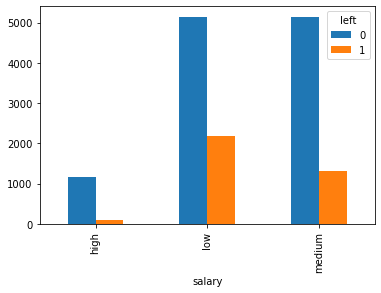

In [8]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.show()

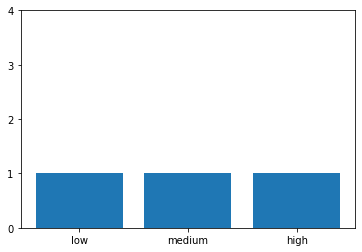

In [9]:
plt.bar(df.salary,df.left)
import numpy as np
plt.yticks(np.arange(0, 5 , 1))
plt.show()

In [12]:
pd.crosstab(df.Department, df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


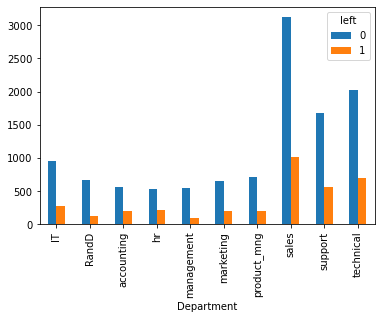

In [11]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.show()

In [13]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
5,0.41,153,0,low
6,0.10,247,0,low
7,0.92,259,0,low
8,0.89,224,0,low
9,0.42,142,0,low


In [14]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
5,0.41,153,0,low,0,1,0
6,0.10,247,0,low,0,1,0
7,0.92,259,0,low,0,1,0
8,0.89,224,0,low,0,1,0
9,0.42,142,0,low,0,1,0


In [15]:
df_with_dummies.drop('salary', axis=1, inplace=True)
df_with_dummies.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
5,0.41,153,0,0,1,0
6,0.10,247,0,0,1,0
7,0.92,259,0,0,1,0
8,0.89,224,0,0,1,0
9,0.42,142,0,0,1,0


In [16]:
x = df_with_dummies
y = df.left

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Shams\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [21]:
model.score(x_test,y_test)

0.7745